MD. TANVIR JAWAD<br>ID: 21101221

In [18]:
try:
    import pint
except ImportError:
    !pip install pint

In [19]:
from os.path import basename, exists

def download(url):
    filename = basename(url)
    if not exists(filename):
        from urllib.request import urlretrieve
        local, _ = urlretrieve(url, filename)
        print('Downloaded ' + local)

download('https://github.com/AllenDowney/ModSimPy/raw/master/modsim.py')

In [20]:
from modsim import *

In [21]:
import numpy as np

def slope_func(t, state, system):
    y, = state
    dydt = y * np.sin(t)
    return dydt

In [22]:
init = State(y=1)
system = System(init=init, t_end=3)

In [23]:
results, details = run_solve_ivp(system, slope_func)
details

  message: The solver successfully reached the end of the integration interval.
  success: True
   status: 0
      sol: <scipy.integrate._ivp.common.OdeSolution object at 0x78448d8bf3a0>
 t_events: None
 y_events: None
     nfev: 50
     njev: 0
      nlu: 0

In [24]:
results.head()

,y
0.00,1.000000
0.03,1.000450
0.06,1.001801
0.09,1.004055
0.12,1.007217


In [25]:
len(results)

101

In [26]:
def slope_func(t, state, system):
    y, = state
    dydt = y * np.sin(t)
    evals.append((t, y, dydt))
    return dydt

In [27]:
evals = []
results2, details = run_solve_ivp(system, slope_func, dense_output=False)

In [28]:
t, y, slope = np.transpose(evals)
theta = np.arctan(slope)
u = np.cos(theta)
v = np.sin(theta)

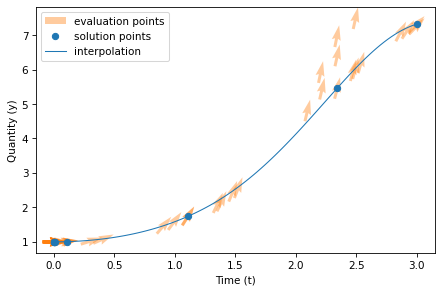

In [29]:
import matplotlib.pyplot as plt

plt.quiver(t, y, u, v, pivot='middle',
           color='C1', alpha=0.4, label='evaluation points')
results2['y'].plot(style='o', color='C0', label='solution points')
results['y'].plot(lw=1, label='interpolation')

decorate(xlabel='Time (t)',
         ylabel='Quantity (y)')